# Comparison of Execution Time and Energy Consumption: Traditional vs. ML-Based Simulations

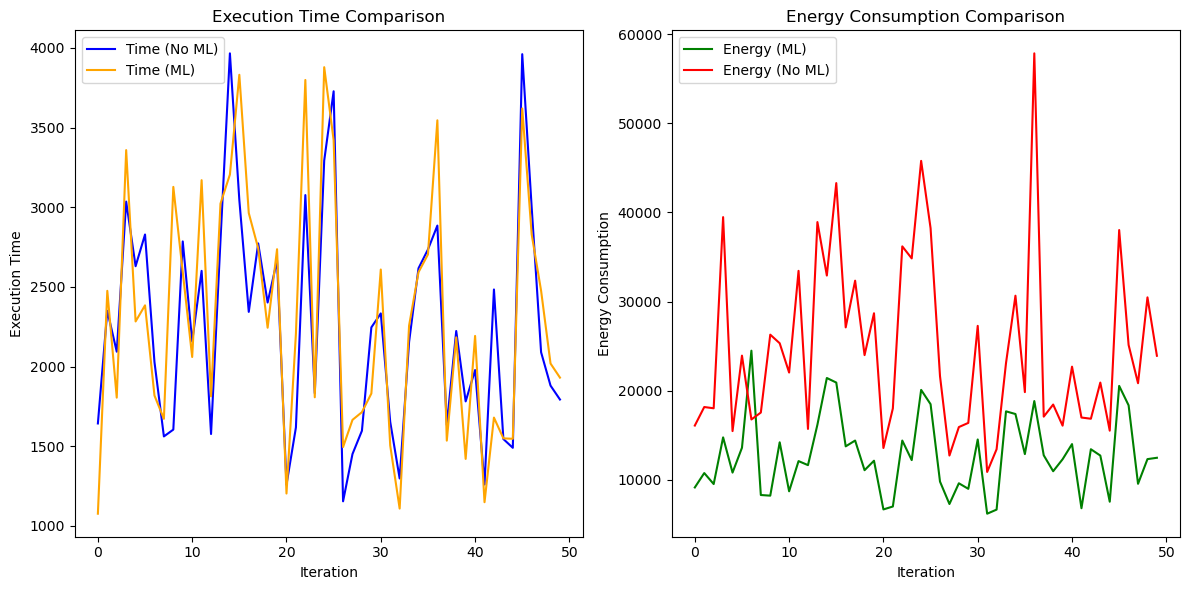

In [16]:
class Cloudlet:
    def __init__(self, id, length, cpu_usage):
        self.id = id
        self.length = length
        self.cpu_usage = cpu_usage

class VirtualMachine:
    def __init__(self, id, processing_power):
        self.id = id
        self.processing_power = processing_power
        self.energy_consumption = 0

    def allocate_resources(self, cloudlet):
        execution_time = cloudlet.length / self.processing_power
        energy = cloudlet.cpu_usage * execution_time
        self.energy_consumption += energy
        return execution_time

def run_simulation_without_ml():
    total_time = 0
    total_energy = 0
    for cloudlet in cloudlets:
        selected_vm = random.choice(vms)
        execution_time = selected_vm.allocate_resources(cloudlet)
        total_time += execution_time
        total_energy += selected_vm.energy_consumption
    return total_time, total_energy

def run_simulation_with_ml(predicted_cpu_usage):
    total_time = 0
    total_energy = 0
    for cloudlet, predicted_cpu in zip(cloudlets, predicted_cpu_usage):
        selected_vm = random.choice(vms)
        cloudlet.cpu_usage = predicted_cpu 
        execution_time = selected_vm.allocate_resources(cloudlet)
        total_time += execution_time
        total_energy += selected_vm.energy_consumption
    return total_time, total_energy

def calculate_optimization(time_no_ml, time_with_ml, energy_no_ml, energy_with_ml):
    time_improvement = max(0, time_no_ml - time_with_ml)
    energy_improvement = max(0, energy_no_ml - energy_with_ml)
    optimization = (time_improvement + energy_improvement) / (time_no_ml + energy_no_ml) * 100
    return optimization


iterations = 50 
results_no_ml = []
results_with_ml = []
optimizations = []

for _ in range(iterations):
    cloudlets = [Cloudlet(i, random.randint(100, 1000), random.uniform(1, 5)) for i in range(10)]
    vms = [VirtualMachine(i, random.uniform(1, 5)) for i in range(5)]
    predicted_cpu_usage = [random.uniform(1, 4) for _ in range(10)]

    time_no_ml, energy_no_ml = run_simulation_without_ml()
    time_with_ml, energy_with_ml = run_simulation_with_ml(predicted_cpu_usage)

    optimization = calculate_optimization(time_no_ml, time_with_ml, energy_no_ml, energy_with_ml)

    results_no_ml.append((time_no_ml, energy_no_ml))
    results_with_ml.append((time_with_ml, energy_with_ml))
    optimizations.append(optimization)

time_no_ml_values = [result[0] for result in results_no_ml]
energy_no_ml_values = [result[1] for result in results_no_ml]
time_with_ml_values = [result[0] for result in results_with_ml]
energy_with_ml_values = [result[1] for result in results_with_ml]

plt.figure(figsize=(12, 6))

# Plot Time comparison
plt.subplot(1, 2, 1)
plt.plot(range(iterations), time_no_ml_values, label="Time (No ML)", color="blue")
plt.plot(range(iterations), time_with_ml_values, label="Time (ML)", color="orange")
plt.xlabel("Iteration")
plt.ylabel("Execution Time")
plt.title("Execution Time Comparison")
plt.legend()

# Plot Energy comparison
plt.subplot(1, 2, 2)
plt.plot(range(iterations), energy_no_ml_values, label="Energy (ML)", color="green")
plt.plot(range(iterations), energy_with_ml_values, label="Energy (No ML)", color="red")
plt.xlabel("Iteration")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption Comparison")
plt.legend()

plt.tight_layout()
plt.show()
